<a href="https://colab.research.google.com/github/CakeLiar/pingmate/blob/main/Ping_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [ ]:
# Constants

N = 5  # initial number of users
Ninc = 2 # user increase rate
Nacc = 1 # user increase of increase rate

initialHappiness = 10
happinessDecrease = 1
happinessIncrease = 2
happinessIncreaseRecieved = 5

pingProbability = .1
addFriendProbability = .5

initialPingPoints = 12
increasePingPoints = 1.5
decreasePingPoints = 1

In [ ]:
class User:
    friendList = []
    pingPoints = 0
    happiness = 0
    deleted = False

    def __init__ (self) :
        self.friendList = []
        self.pingPoints = initialPingPoints
        self.happiness = initialHappiness
        deleted = False

    def ping (self, other, _) :
        other.pingPoints += increasePingPoints
        self.pingPoints -= decreasePingPoints
        other.happiness+=happinessIncreaseRecieved/np.log(_+1) # (/np.log(_+1)) represents boredom
        self.happiness+=happinessIncrease/np.log(_+1) # (/np.log(_+1)) represents boredom

    def addFriend(self, other):
        self.friendList.append(other)
users = []

In [ ]:
# Build the environment

users.clear()

for i in range(N):
  users.append(User())


for i in range(N):
  for j in range(N-i):
    if (random.random() < addFriendProbability):
      users[i+j].addFriend(users[i])
      users[i].addFriend(users[j+i])

In [ ]:
# Run the simulation

ping_means = []
happiness_means = []
Ns = []

_ = 0
hasPoints = True
while (hasPoints and _< 20):
  _ = _+1

  hasPoints = False


  print(N)
  for i in range(Ninc) :
    users.append(User())
    N += 1
  Ninc += Nacc
  Nacc+= 1

  print(N)

  sig = 0

  Ns.append(N)

  for user in users:
    if (user.happiness > 0):
      sig += user.happiness
  happiness_means.append(sig/N)


  sig = 0
  for user in users:
    if (user.pingPoints > 0):
      sig += user.pingPoints
  ping_means.append(sig/N)

  for i in range(N):
    users[i].happiness-=happinessDecrease

    if (users[i].deleted or users[i].happiness<=0):
      users[i].deleted = True
      pass

    if (users[i].pingPoints > 0):
      hasPoints = True

    for j in range(N):

      if (users[j].deleted):
        pass
      rr = random.random()
      if (rr <= pingProbability/np.log(_+1)) : # (/np.log(_+1)) represents boredom
        users[i].ping(users[j], _)

5
7
7
10
10
15
15
23
23
35
35
52
52
75
75
105
105
143
143
190
190
247
247
315
315
395
395
488
488
595
595
717
717
855
855
1010
1010
1183
1183
1375


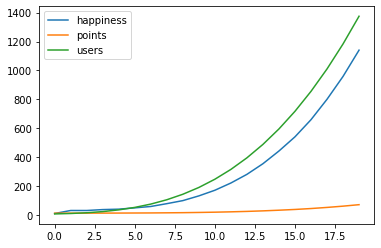

In [ ]:
plt.plot(happiness_means, label='happiness')
plt.plot(ping_means, label='points')
plt.plot(Ns, label='users')
plt.legend()
plt.show()